#### Initialise lattice

In [1]:
from initialisation import *

# Import empirical vegetation density
Vs = {landscape: matrix_to_dict(np.loadtxt('field-data/'+landscape+'/vegetation.asc', skiprows=6)[1:-1,1:-1]/100) for landscape in ['shrubland', 'grassland']}

# Import empirical topography
Ts = {landscape: matrix_to_dict(np.loadtxt('field-data/'+landscape+'/topography.asc', skiprows=6)[1:-1,1:-1]) for landscape in ['shrubland', 'grassland']}


#### Import rainfall and sediment empirical data

In [69]:
events = {'grassland': ['07.09.05', '05.07.06', '29.08.06', '07.09.06'],
          'shrubland': ['07.09.05', '05.07.06', '28.07.06', '11.08.06', '23.08.06']}
nb_events = {landscape: len(events[landscape]) for landscape in ['grassland', 'shrubland']}

data_tables = {landscape: {} for landscape in ['grassland', 'shrubland']}
for landscape in ['grassland', 'shrubland']:
    data_tables[landscape] = {events[landscape][k]: pd.read_excel('field-data/monitored_rainfall_events.xlsx', sheet_name=landscape+' '+events[landscape][k]) for k in range(nb_events[landscape])}


#### Visualisation

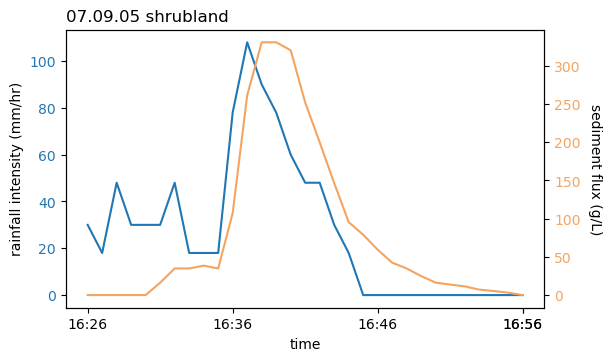

In [90]:
landscape = int(input('Select the empirical landscape (boolean integer) you want to visualise: 0 for shrubland, or 1 for grassland.'))
landscape = 'shrubland' if landscape==0 else 'grassland'

event = int(input("Select one rainfall event on "+landscape+f": {' // '.join(str(k)+' for '+events[landscape][k] for k in range(nb_events[landscape]))}"))
event = events[landscape][event]
rainfall = data_tables[landscape][event]

plt.figure(figsize=(6,3.5), constrained_layout=True)
plt.plot(rainfall.Time, rainfall['Rain (mm/hr)'], label='rainfall intensity (mm/hr)')
tick_indices = list(np.linspace(0, len(rainfall)-1, 4, int))+[len(rainfall)-1]
_ = plt.xticks(tick_indices, rainfall.Time.iloc[tick_indices])
plt.title(event+' '+landscape, loc='left')
ax1 = plt.gca()
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylabel('rainfall intensity (mm/hr)')
ax2 = ax1.twinx()
ax2.plot(rainfall.Time, (rainfall['scaled min Q'] + rainfall['scaled max Q'])/2, color='sandybrown', label='sediment flux')
ax2.tick_params(axis='y', labelcolor='sandybrown')
ax2.set_ylabel('sediment flux (g/L)', rotation=270, labelpad=15)
ax1.set_xlabel('time')
plt.show()
